In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()


# PubChem AID 	1919971

## Assay info

Dietary Supplements and Natural Products have minor oversight of their safety and efficacy. We assembled a collection of Dietary Supplements and Natural Products (DSNP) as well as Traditional Chinese Medicinal (TCM) Plant extracts, which were screened against an in vitro panel of assays, including a liver cytochrome p450 enzyme panel, CAR/PXR signaling pathways, and P-gp transporter assays, to assess their activity. This pipeline facilitated the interrogation of Natural Product-Drug Interaction (NaPDI) through prominent metabolizing pathways. In addition, we compared the activity profiles of the DSNP/TCM substances with those of an approved drug collection. Many of the approved drugs have well-annotated mechanisms of action (MOA) while the MOAs for most of the DSNP and TCM samples remain unknown. Based on the premise that compounds with similar activity profiles tend to share similar targets or MOA, we clustered the library activity profiles to identify overlap with the NCATS Pharmaceutical Collection to predict the MOAs of the DSNP/TCM substances. Overall, we highlight four significant bioactivity profiles (measured by p-values) as examples of this prediction. To assess broad cytotoxicity, we employed screening against a HepG2 cell line. In addition, transporter-mediated drug interactions are utilized in the characterization of DDIs using a P-glycoprotein (P-gp) assays [1]. To profile potential P-gp activity, a differential cell viability was measured against two cell lines: a parental KB-3-1 human cervical adenocarcinoma cell line and the drug-resistant subline KB-8-5-11 that overexpresses P-gp.


Modulation of CAR and PXR have been shown to cause up/down regulation of CYP enzymes at the mRNA, protein, and activity levels. To this end, we profiled both collections for potential CAR and/or PXR activity, employing a previously published 1536-well qHTS assay. These results can be used as a starting point for further exploration on the toxicity potential and clinical relevance of these substances.


Reference:

[1] Lee TD, et al. A High-Throughput Screen of a Library of Therapeutics Identifies Cytotoxic Substrates of P-glycoprotein. Mol Pharmacol. Nov 2019;96(5):629-640. doi:10.1124/mol.119.115964

In [3]:
df = pd.read_csv("PubChem_AID_1919971/AID_1919971_datatable_all.csv")

In [4]:
list(df.columns)

['PUBCHEM_RESULT_TAG',
 'PUBCHEM_SID',
 'PUBCHEM_CID',
 'PUBCHEM_EXT_DATASOURCE_SMILES',
 'PUBCHEM_ACTIVITY_OUTCOME',
 'PUBCHEM_ACTIVITY_SCORE',
 'PUBCHEM_ACTIVITY_URL',
 'PUBCHEM_ASSAYDATA_COMMENT',
 'Phenotype',
 'Potency',
 'Efficacy',
 'Analysis Comment',
 'Activity_Score',
 'Curve_Description',
 'Fit_LogAC50',
 'Fit_HillSlope',
 'Fit_R2',
 'Fit_InfiniteActivity',
 'Fit_ZeroActivity',
 'Fit_CurveClass',
 'Excluded_Points',
 'Max_Response',
 'Activity at 0.0003320000 uM',
 'Activity at 0.0009960000 uM',
 'Activity at 0.00191 uM',
 'Activity at 0.00299 uM',
 'Activity at 0.00678 uM',
 'Activity at 0.00903 uM',
 'Activity at 0.025 uM',
 'Activity at 0.039 uM',
 'Activity at 0.081 uM',
 'Activity at 0.162 uM',
 'Activity at 0.263 uM',
 'Activity at 0.702 uM',
 'Activity at 1.291 uM',
 'Activity at 2.222 uM',
 'Activity at 4.274 uM',
 'Activity at 7.106 uM',
 'Activity at 18.80 uM',
 'Activity at 34.14 uM',
 'Activity at 58.33 uM',
 'Activity at 103.6 uM',
 'Activity at 207.7 uM',
 'Act

In [5]:
# first 5 rows are metadata 
df[0:5]

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype,Potency,...,Activity at 34.14 uM,Activity at 58.33 uM,Activity at 103.6 uM,Activity at 207.7 uM,Activity at 483.1 uM,Activity at 966.3 uM,Activity at 1932.0 uM,Activity at 3487.5 uM,Activity at 3920.0 uM,Compound QC
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STRING,FLOAT,...,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,STRING
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indicates type of activity observed: inhibitor...,Concentration at which compound exhibits half-...,...,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,NCGC designation for compound QC
2,RESULT_UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MICROMOLAR,...,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,NaN
3,RESULT_IS_ACTIVE_CONCENTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RESULT_ATTR_CONC_MICROMOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.1385,58.3308,103.599,207.708,483.142,966.28,1932.03,3487.47,3920,NaN


In [6]:
    df = df.drop(labels=list(range(0, 5)), axis=0).reset_index(
        drop=True
    )

In [7]:
df.head(10)

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype,Potency,...,Activity at 34.14 uM,Activity at 58.33 uM,Activity at 103.6 uM,Activity at 207.7 uM,Activity at 483.1 uM,Activity at 966.3 uM,Activity at 1932.0 uM,Activity at 3487.5 uM,Activity at 3920.0 uM,Compound QC
0,1,471430965.0,NaN,NaN,Active,91.0,http://assay.nih.gov/htsws/rest/display/DSHEA-...,NaN,Inhibitor,0.2373,...,NaN,-96.9823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by NCI-NPB
1,2,471431003.0,NaN,NaN,Active,90.0,http://assay.nih.gov/htsws/rest/display/DSHEA-...,NaN,Inhibitor,0.2663,...,NaN,-96.7907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by NCI-NPB
2,3,471431064.0,NaN,NaN,Active,90.0,http://assay.nih.gov/htsws/rest/display/DSHEA-...,NaN,Inhibitor,0.2663,...,NaN,-96.2232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by NCI-NPB
3,4,471430882.0,NaN,NaN,Active,89.0,http://assay.nih.gov/htsws/rest/display/DSHEA-...,NaN,Inhibitor,0.7505,...,NaN,-96.2348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by NCI-NPB
4,5,471430919.0,NaN,NaN,Active,89.0,http://assay.nih.gov/htsws/rest/display/DSHEA-...,NaN,Inhibitor,0.3762,...,NaN,-96.3568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by NCI-NPB
5,6,471430901.0,NaN,NaN,Active,88.0,http://assay.nih.gov/htsws/rest/display/DSHEA-...,NaN,Inhibitor,0.8421,...,NaN,-93.5414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by NCI-NPB
6,7,471431106.0,NaN,NaN,Active,88.0,http://assay.nih.gov/htsws/rest/display/DSHEA-...,NaN,Inhibitor,0.8421,...,NaN,-94.3565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by NCI-NPB
7,8,472319572.0,NaN,NaN,Active,88.0,http://assay.nih.gov/htsws/rest/display/DSHEA-...,NaN,Inhibitor,891.251,...,-8.2446,-7.232,-6.6139,-30.5618,-23.0972,-67.3762,-97.6197,NaN,-101.36,QC'd by Spectrum Chemical
8,9,471430875.0,NaN,NaN,Active,87.0,http://assay.nih.gov/htsws/rest/display/DSHEA-...,NaN,Inhibitor,1.1895,...,NaN,-90.2075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by NCI-NPB
9,10,471431094.0,NaN,NaN,Active,87.0,http://assay.nih.gov/htsws/rest/display/DSHEA-...,NaN,Inhibitor,1.8852,...,NaN,-95.5903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by NCI-NPB


In [8]:
df.columns

Index(['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
       'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME',
       'PUBCHEM_ACTIVITY_SCORE', 'PUBCHEM_ACTIVITY_URL',
       'PUBCHEM_ASSAYDATA_COMMENT', 'Phenotype', 'Potency', 'Efficacy',
       'Analysis Comment', 'Activity_Score', 'Curve_Description',
       'Fit_LogAC50', 'Fit_HillSlope', 'Fit_R2', 'Fit_InfiniteActivity',
       'Fit_ZeroActivity', 'Fit_CurveClass', 'Excluded_Points', 'Max_Response',
       'Activity at 0.0003320000 uM', 'Activity at 0.0009960000 uM',
       'Activity at 0.00191 uM', 'Activity at 0.00299 uM',
       'Activity at 0.00678 uM', 'Activity at 0.00903 uM',
       'Activity at 0.025 uM', 'Activity at 0.039 uM', 'Activity at 0.081 uM',
       'Activity at 0.162 uM', 'Activity at 0.263 uM', 'Activity at 0.702 uM',
       'Activity at 1.291 uM', 'Activity at 2.222 uM', 'Activity at 4.274 uM',
       'Activity at 7.106 uM', 'Activity at 18.80 uM', 'Activity at 34.14 uM',
       'Activity at 58

In [9]:
# lets look at activity

<Axes: xlabel='PUBCHEM_ACTIVITY_OUTCOME', ylabel='Count'>

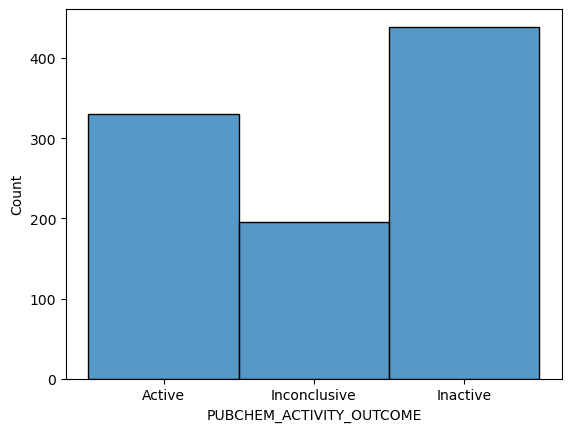

In [10]:
sns.histplot(data=df, x="PUBCHEM_ACTIVITY_OUTCOME")

In [11]:
df["Phenotype"].value_counts()

Phenotype
Inhibitor    525
Inactive     427
Activator     12
Name: count, dtype: int64

In [12]:
df = df.query("Phenotype == 'Inhibitor'")

In [13]:
import matplotlib.pyplot as plt

In [14]:
df["PUBCHEM_ACTIVITY_SCORE"]

0      91.0
1      90.0
2      90.0
3      89.0
4      89.0
       ... 
520    10.0
521    10.0
522    10.0
523    10.0
524    10.0
Name: PUBCHEM_ACTIVITY_SCORE, Length: 525, dtype: float64

In [15]:
mol_col = "PUBCHEM_EXT_DATASOURCE_SMILES"
mol_id_cols = ["PUBCHEM_SID", "PUBCHEM_CID"]

In [16]:
len(df)

525

In [17]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid

In [18]:

# from Pat Walters method
def standardize_smiles(smiles):
    try:
        # follows the steps in
        # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
        # as described **excellently** (by Greg) in
        # https://www.youtube.com/watch?v=eWTApNX8dJQ
        mol = Chem.MolFromSmiles(smiles)
    
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)
    
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    
        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger()  # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.
    
        te = rdMolStandardize.TautomerEnumerator()  # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    
        return Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    except:
        return pd.NA

In [19]:

with BlockLogs():
    df["CANONICAL_SMILES"] = df[mol_col].progress_apply(lambda x: standardize_smiles(x))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 525/525 [00:03<00:00, 163.67it/s]


In [20]:
def smi_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToInchiKey(mol)
    except:
        return pd.NA

In [21]:
# compute inchikeys
with BlockLogs():
    df["INCHIKEY"] = df["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 525/525 [00:00<00:00, 13540.75it/s]


In [22]:
df.INCHIKEY.isna().sum() # there are a few that couldn't be standardised

np.int64(454)

In [34]:
df.dropna(subset="INCHIKEY", inplace=True)

In [35]:
# lets gather up the activities?

In [36]:
# ok, clean up DF, and segement into active and inactives,

In [37]:
keep_cols = ["CANONICAL_SMILES", "INCHIKEY", "PUBCHEM_ACTIVITY_OUTCOME", "PUBCHEM_CID"]

In [38]:
clean = df[keep_cols]

In [39]:
clean["dataset"] = "aid191971"
clean["data_type"] = "assay"

/tmp/ipykernel_174843/3760698950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["dataset"] = "aid191971"
/tmp/ipykernel_174843/3760698950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["data_type"] = "assay"


In [40]:
clean["active"] = clean["PUBCHEM_ACTIVITY_OUTCOME"] == "Active"

/tmp/ipykernel_174843/212178452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["active"] = clean["PUBCHEM_ACTIVITY_OUTCOME"] == "Active"


In [41]:
mols2grid.display(clean, smiles_col="CANONICAL_SMILES")

MolGridWidget()

In [42]:
clean.head()
clean["common_name"] = pd.NA
clean["action_type"] = "inhibitor"
clean["active"] = clean["PUBCHEM_ACTIVITY_OUTCOME"] == "Active"

/tmp/ipykernel_174843/831850103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["common_name"] = pd.NA
/tmp/ipykernel_174843/831850103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["action_type"] = "inhibitor"
/tmp/ipykernel_174843/831850103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [43]:
clean.to_csv("./processed/AID_1919971.csv", index=False)

In [33]:
# spot checked structures with a few pubchem CIDs, looks like translation went ok